In [1]:
import sys
import os
import re
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import os
import zipfile

local_zip = r'C:\Users\Utkarsh\Desktop\Human activity\MHEALTHDATASET.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
for i in os.listdir('/tmp/MHEALTHDATASET'):
  if not re.search('README', i):
    print(i)

mHealth_subject1.log
mHealth_subject10.log
mHealth_subject2.log
mHealth_subject3.log
mHealth_subject4.log
mHealth_subject5.log
mHealth_subject6.log
mHealth_subject7.log
mHealth_subject8.log
mHealth_subject9.log


In [4]:
mHealth = []
all = list()

for i in os.listdir('/tmp/MHEALTHDATASET/'):
  if not re.search('README', i):
    all.append(pd.read_csv('/tmp/MHEALTHDATASET/'+i,
                                 header=None, sep='\t').loc[:, 
            [5,6,7,8,9,10,14,15,16,17,18,19, 23]].rename(columns={5:"alX", 6:"alY",
            7:"alZ", 8:"glX", 9:"glY", 10:"glZ", 14:"arX",15:"arY", 16:"arZ", 17:"grX", 18:"grY", 19:"grZ", 23:"Output"}))

In [5]:
SAMPLES_PER_ACTIVITY=50  

Activities = [
    "Nothing",
    "Standing",
    "Sitting and Relaxing",
    "Lying Down",
    "Walking",
    "Climbing Stairs",
    "Waist bends forward",
    "Frontal Elevation of Arms",
    "Knees Bending (Crouching)",
    "Cycling",
    "Jogging",
    "Running",
    "Jump Front & Back"
    ]


NUM_ACTIVITY=len(Activities)
X = []
Y = []
FEATURES=["alX", "alY", "alZ", "glX", "glY", "glZ", "arX", "arY", "arZ", "grX", "grY", "grZ"]
ONE_HOT_ENCODED_ACTIVITY = np.eye(NUM_ACTIVITY)
for i in os.listdir('/tmp/MHEALTHDATASET/'):
  if not re.search('README', i):
    temp = pd.read_csv('/tmp/MHEALTHDATASET/'+i, header=None, sep='\t').loc[:, [5,6,7,8,9,10,14,15,16,17,18,19, 23]].rename(columns={5:"alX", 6:"alY", 7:"alZ", 8:"glX", 9:"glY", 10:"glZ", 14:"arX",15:"arY", 16:"arZ", 17:"grX", 18:"grY", 19:"grZ", 23:"Output"})
    for j in range(NUM_ACTIVITY):
        output = ONE_HOT_ENCODED_ACTIVITY[j]
        df =np.array(temp[temp["Output"] == j].copy())
        num_recordings = int(df.shape[0]/SAMPLES_PER_ACTIVITY)
        print(f"\tThere are {num_recordings} recordings of the {Activities[j]} activity.")
        for k in range(num_recordings):
          tensor = []
          for l in range(SAMPLES_PER_ACTIVITY):
            index = k * SAMPLES_PER_ACTIVITY + l
            tensori = []
            for m,feature in enumerate(FEATURES):
              tensori.append(df[index,m])
              tensor.append(tensori)

          X.append(tensor)
          Y.append(output)

X = np.array(X)
Y = np.array(Y)


	There are 2522 recordings of the Nothing activity.
	There are 61 recordings of the Standing activity.
	There are 61 recordings of the Sitting and Relaxing activity.
	There are 61 recordings of the Lying Down activity.
	There are 61 recordings of the Walking activity.
	There are 61 recordings of the Climbing Stairs activity.
	There are 61 recordings of the Waist bends forward activity.
	There are 61 recordings of the Frontal Elevation of Arms activity.
	There are 67 recordings of the Knees Bending (Crouching) activity.
	There are 61 recordings of the Cycling activity.
	There are 61 recordings of the Jogging activity.
	There are 61 recordings of the Running activity.
	There are 21 recordings of the Jump Front & Back activity.
	There are 1292 recordings of the Nothing activity.
	There are 61 recordings of the Standing activity.
	There are 61 recordings of the Sitting and Relaxing activity.
	There are 61 recordings of the Lying Down activity.
	There are 61 recordings of the Walking activi

In [6]:
print(X)

[[[ 2.1849e+00 -9.6967e+00  6.3077e-01 ... -4.4902e-01 -1.0103e+00
    3.4483e-02]
  [ 2.1849e+00 -9.6967e+00  6.3077e-01 ... -4.4902e-01 -1.0103e+00
    3.4483e-02]
  [ 2.1849e+00 -9.6967e+00  6.3077e-01 ... -4.4902e-01 -1.0103e+00
    3.4483e-02]
  ...
  [ 1.7032e+00 -9.5888e+00  5.2718e-01 ... -4.5098e-01 -1.0062e+00
    2.1552e-03]
  [ 1.7032e+00 -9.5888e+00  5.2718e-01 ... -4.5098e-01 -1.0062e+00
    2.1552e-03]
  [ 1.7032e+00 -9.5888e+00  5.2718e-01 ... -4.5098e-01 -1.0062e+00
    2.1552e-03]]

 [[ 1.9054e+00 -9.4307e+00  4.9544e-01 ... -4.5098e-01 -1.0062e+00
    2.1552e-03]
  [ 1.9054e+00 -9.4307e+00  4.9544e-01 ... -4.5098e-01 -1.0062e+00
    2.1552e-03]
  [ 1.9054e+00 -9.4307e+00  4.9544e-01 ... -4.5098e-01 -1.0062e+00
    2.1552e-03]
  ...
  [ 1.4417e+00 -9.6452e+00 -1.6576e-01 ... -5.0784e-01 -9.9795e-01
    1.2931e-02]
  [ 1.4417e+00 -9.6452e+00 -1.6576e-01 ... -5.0784e-01 -9.9795e-01
    1.2931e-02]
  [ 1.4417e+00 -9.6452e+00 -1.6576e-01 ... -5.0784e-01 -9.9795e-01
    1.

In [7]:

from tensorflow.keras import layers, Sequential, Input
from keras.layers import Dropout
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [8]:


X = X.reshape((X.shape[0], X.shape[1], X.shape[2], 1))
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

input_shape=X.shape[1:]

X.shape
print(input_shape)


(600, 12, 1)


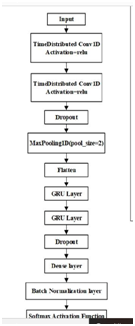

In [32]:
model = Sequential(
    [
     Input(shape=input_shape),
     layers.Conv2D(64, (3)),
     layers.Conv2D(64, (3,3)),
     layers.Dropout(0.2),
     layers.MaxPool2D((2,2)),
     layers.BatchNormalization(),  
     layers.Reshape((-1, 64)),
     layers.GRU(15),

     layers.Flatten(),

     layers.Dense(128, activation="relu"),
     layers.Dense(13, activation="softmax"),

    ]

)

In [33]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 598, 10, 64)       640       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 596, 8, 64)        36928     
_________________________________________________________________
dropout_7 (Dropout)          (None, 596, 8, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 298, 4, 64)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 298, 4, 64)        256       
_________________________________________________________________
reshape_12 (Reshape)         (None, None, 64)          0         
_________________________________________________________________
gru_13 (GRU)                 (None, 15)               

In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [35]:
history = model.fit(x= X_train, y=Y_train, epochs=5, validation_data =(X_test,Y_test))


Train on 18193 samples, validate on 6065 samples
Epoch 1/5
18193/18193 [==============================] - 1326s 73ms/sample - loss: 1.0309 - accuracy: 0.7259 - val_loss: 0.8742 - val_accuracy: 0.7400
Epoch 2/5
18193/18193 [==============================] - 1225s 67ms/sample - loss: 0.8348 - accuracy: 0.7387 - val_loss: 0.8032 - val_accuracy: 0.7448
Epoch 3/5
18193/18193 [==============================] - 1419s 78ms/sample - loss: 0.7646 - accuracy: 0.7412 - val_loss: 0.7618 - val_accuracy: 0.7500
Epoch 4/5
18193/18193 [==============================] - 1267s 70ms/sample - loss: 0.7271 - accuracy: 0.7420 - val_loss: 0.7449 - val_accuracy: 0.7545
Epoch 5/5
18193/18193 [==============================] - 1211s 67ms/sample - loss: 0.6976 - accuracy: 0.7458 - val_loss: 0.7872 - val_accuracy: 0.7499


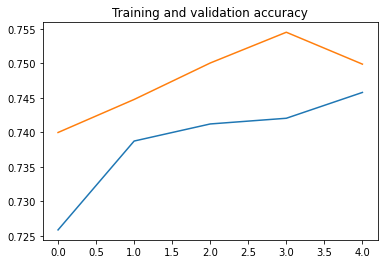

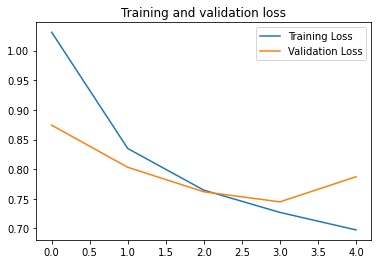

In [38]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()